In [67]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import os


In [69]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-v0_8') # pretty matplotlib plots


## Load Data

In [2]:
data_dir = 'data_reviews'
x_train_df = pd.read_csv(os.path.join(data_dir, 'x_train.csv'))
y_train_df = pd.read_csv(os.path.join(data_dir, 'y_train.csv'))

N, n_cols = x_train_df.shape
print("Shape of x_train_df: (%d, %d)" % (N,n_cols))
print("Shape of y_train_df: %s" % str(y_train_df.shape))
x_train_df

Shape of x_train_df: (2400, 2)
Shape of y_train_df: (2400, 1)


,website_name,text
0,amazon,Oh and I forgot to also mention the weird colo...
1,amazon,THAT one didn't work either.
2,amazon,Waste of 13 bucks.
3,amazon,"Product is useless, since it does not have eno..."
4,amazon,None of the three sizes they sent with the hea...
...,...,...
2395,yelp,The sweet potato fries were very good and seas...
2396,yelp,I could eat their bruschetta all day it is dev...
2397,yelp,Ambience is perfect.
2398,yelp,We ordered the duck rare and it was pink and t...


In [3]:
# df to list
tr_text_list = x_train_df['text'].values.tolist()

In [4]:
y_train_list = y_train_df['is_positive_sentiment'].values.tolist()
len(y_train_list)

2400

In [5]:
y_train_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


## Partition sentences into words

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
vectorizer = CountVectorizer()

### How big is my vocabulary?

In [8]:
x = vectorizer.fit_transform(tr_text_list)
vocab = vectorizer.get_feature_names_out()
vocab.shape[0]

4510

In [9]:
x_train_NV = x.toarray()
x_train_NV.shape # N is the number of sentences, and V is the number of vocabulary

(2400, 4510)

In [10]:
N = x_train_NV.shape[0]
V = x_train_NV.shape[1]
N,V

(2400, 4510)

In [11]:
vectorizer.vocabulary_.get('the')

3941

### Get the common and rare

In [12]:
x_train_NV[0][2701] # search the first sentence for 'oh'

1

In [13]:
x_common = []

x_col_sum = np.sum(x_train_NV, axis = 0)

np.max(x_col_sum)

1572

In [14]:
x_col_sum.shape, x_col_sum[2701]

((4510,), 9)

In [15]:
x_common = x_col_sum > N/2 # happens half of the time 
x_common_V = [int(x) for x in x_common]
x_common_V = np.array(x_common_V)

In [16]:
x_rare = x_col_sum < 10
x_rare_V = [int(x) for x in x_rare]
x_rare_V = np.array(x_rare_V)

In [17]:
x_common_V.shape, x_rare_V.shape

((4510,), (4510,))

In [18]:
# x_common_V.reshape(V, 1)

In [19]:
x_common = x_train_NV * x_common_V 
x_rare = x_train_NV * x_rare_V

idx = vectorizer.vocabulary_.get('good')
idx

1752

In [20]:
np.sum(x_train_NV[:, idx])

185

In [21]:
x_rare.shape, x_common.shape

((2400, 4510), (2400, 4510))

### Get Normal

In [22]:
x_normal = x_train_NV * (1 - x_common_V) * (1 - x_rare_V)

In [23]:
x_normal[:, idx]

array([0, 0, 0, ..., 0, 0, 1])

In [24]:
y_train_list = np.array(y_train_list)
y_train_list

array([0, 0, 0, ..., 1, 1, 1])

In [25]:
# x_normal_copy = np.copy(x_normal)
# x_normal_copy[0].shape, x_common_V.shape

In [26]:
# x = []

In [27]:
# y_train_list.shape, x_common_V.shape[0]

In [28]:
# for i in range(x_common_V.shape[0]):
#     if x_common_V[i] == 1:
#         x_normal_copy = np.delete(x_normal_copy, i, axis=1)
    
    

In [29]:
# x_normal_copy.shape

In [30]:
# t = {[0,0,0,0],[0,1,0,1]}

In [31]:
%run performance_metrics.py
%run cross_validation.py

In [32]:
# calc_root_mean_squared_error()
# train_models_and_calc_scores_for_n_fold_cv
# make_train_and_test_row_ids_for_n_fold_cv

In [33]:
M = 2

x_tr_M2 = np.random.randint(2, size=10).reshape(-1, 1)
x_va_N2 = np.random.randint(2, size=10).reshape(-1, 1)
y_tr_M = np.random.randint(2, size=10)
y_va_N = np.random.randint(2, size=10)
x_tr_M2, x_va_N2, y_tr_M, y_va_N

(array([[1],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [0]]),
 array([[1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0]]),
 array([1, 0, 0, 1, 1, 0, 1, 1, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1]))

## Cross Validation

In [34]:
%run binary_metrics.py
%run proba_metrics.py

In [35]:
K = 3 # num folds of CV
random_state = 1234

train_error_per_fold = np.zeros(K, dtype=np.float32)
test_error_per_fold = np.zeros(K, dtype=np.float32)

N = x_normal.shape[0]
# TODO define the folds here by calling your function
# e.g. ... = make_train_and_test_row_ids_for_n_fold_cv(...)
train_ids, test_ids = make_train_and_test_row_ids_for_n_fold_cv(
    N, K, random_state)

len(train_ids[0]), len(test_ids[0])

(1599, 801)

In [36]:
y_list = y_train_list

In [37]:
y_list

array([0, 0, 0, ..., 1, 1, 1])

## normalize the data

In [58]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# x_normal = scaler.fit_transform(x_normal)

In [62]:
# x_normal

In [52]:
# partition the data into train and test

x_tr, y_tr = list(), list()
y_va, x_va = list(), list()


for i in range(len(train_ids)):
    x_tr.append(x_normal[train_ids[i]])
    y_tr.append(y_list[train_ids[i]])

for i in range(len(test_ids)):
    x_va.append(x_normal[test_ids[i]])
    y_va.append(y_list[test_ids[i]])


len(x_tr[0])

1599

In [53]:
C_grid = np.logspace(-9, 6, 50)

In [80]:
# Allocate lists for storing BCE metrics
cv_tr_bce_list = list()
cv_va_bce_list = list()
cv_te_bce_list = list()



In [81]:
x_tr[0].shape

(1599, 4510)

In [82]:
for i in range(K):
    
    print(i) # show progress
    
    model_F3_list = list()

    # Allocate lists for storing BCE metrics
    tr_bce_list = list()
    va_bce_list = list()
    te_bce_list = list()

    # Allocate lists for storing ERROR RATE metrics
    tr_err_list = list()
    va_err_list = list()
    te_err_list = list()
    
    xtr = x_tr[i]
    ytr = y_tr[i]
    xva = x_va[i]
    yva = y_va[i]
    
    for C in C_grid:
        # TODO: Follow the instruction in HW2 and train the model lr_F2
        # Part a: Initialize a LogisticRegression classifier with desired C value
        # Part b: train the model with the 2-feature dataset
        lr_F3 = sklearn.linear_model.LogisticRegression(C = C, penalty = 'l2', solver='lbfgs', max_iter = 2000) # TODO fixme
        lr_F3.fit(xtr, ytr) # TODO fixme

        model_F3_list.append(lr_F3)

        yproba1_tr_M = lr_F3.predict_proba(xtr)[:,1] # The probability of predicting class 1 on the training set
        yproba1_va_N = lr_F3.predict_proba(xva)[:,1] # The probability of predicting class 1 on the validation set

        # Compute error rate aka zero-one loss
        my_tr_err = sklearn.metrics.zero_one_loss(ytr, yproba1_tr_M >= 0.5)
        my_va_err = sklearn.metrics.zero_one_loss(yva, yproba1_va_N >= 0.5)
        tr_err_list.append(my_tr_err)
        va_err_list.append(my_va_err)

        # TODO: using the calc_mean_binary_cross_entropy_from_probas() function from above:
        # Part c: calculate the binary cross entropy (bce) on the training set
        # Part d: calculate the binary cross entropy (bce) on the validation set
        my_tr_bce = calc_mean_binary_cross_entropy_from_probas(ytr, yproba1_tr_M) # TODO fixme
        my_va_bce = calc_mean_binary_cross_entropy_from_probas(yva, yproba1_va_N) # TODO fixme
        # Save bce for future selection on Models.
        tr_bce_list.append(my_tr_bce) 
        va_bce_list.append(my_va_bce) 
    
    
    best_C_idx = np.argmin(va_bce_list)
    best_C__lrF3 = C_grid[best_C_idx]
    best_lrF3 = model_F3_list[best_C_idx]
    
    cv_tr_bce_list.append(tr_bce_list[best_C_idx])
    cv_va_bce_list.append(va_bce_list[best_C_idx])
    


In [83]:
cv_va_bce_list, cv_tr_bce_list

([0.7063019788170893, 0.7278383752195593, 0.710130104896278],
 [0.5258449019740917, 0.5231514888238765, 0.5243081711602664])

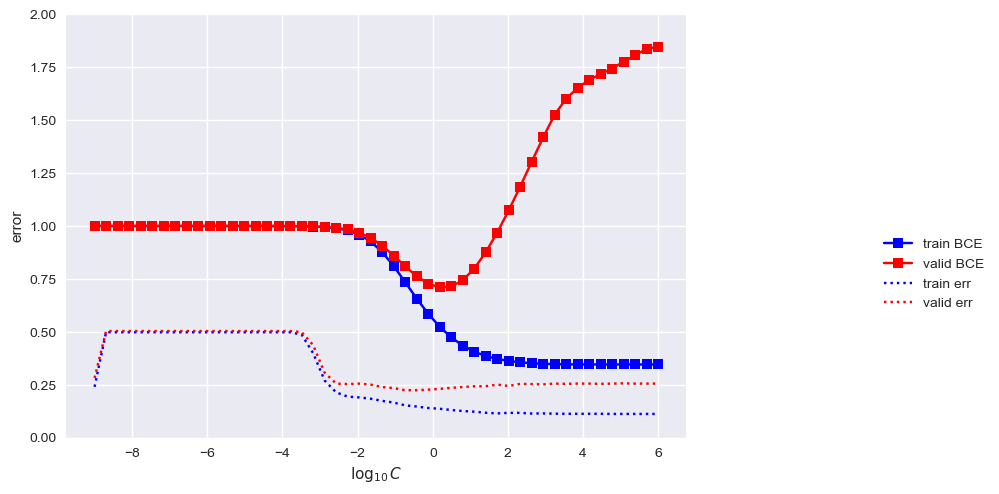

In [84]:
plt.plot(np.log10(C_grid), tr_bce_list, 'bs-', label='train BCE')
plt.plot(np.log10(C_grid), va_bce_list, 'rs-', label='valid BCE')

plt.plot(np.log10(C_grid), tr_err_list, 'b:', label='train err')
plt.plot(np.log10(C_grid), va_err_list, 'r:', label='valid err')

plt.ylabel('error')
plt.xlabel("$\log_{10} C$");
plt.legend(bbox_to_anchor=(1.5, 0.5)) # make legend outside plot
plt.ylim([0, 2]);

In [88]:
print("Best model has coefficient values:")
print(best_lrF3.coef_.shape)

Best model has coefficient values:
(1, 4510)


In [121]:
len(y_va[0])

801

In [112]:
# get lowest cv error fold on validation set
best_fold = np.argmin(cv_va_bce_list)
best_fold

0

In [126]:
prng = np.random.RandomState(101)

bestlr_yproba1_tr = best_lrF3.predict_proba(x_tr[best_fold])[:,1] # TODO fixme
bestlr_yproba1_va = best_lrF3.predict_proba(x_va[best_fold])[:,1] # TODO fixme


In [127]:
bestlr_yproba1_va.shape

(801,)

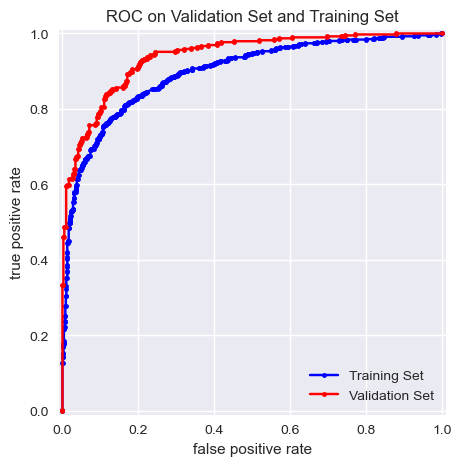

In [128]:
# Follow the instruction of HW2 and produce Figure 1 for your report:
plt.subplots(nrows=1, ncols=1, figsize=(5,5));

# TODO Use provided data and predictions on the Validation set
# Produce the ROC Curve utilizing `sklearn.metrics.roc_curve' within plt defined above.
# To start, read the official Document and examples of 'sklearn.metrics.roc_curve'. 
va_fpr, va_tpr, va_thresholds = sklearn.metrics.roc_curve(y_va[best_fold], bestlr_yproba1_va)
tr_fpr, tr_tpr, tr_thresholds = sklearn.metrics.roc_curve(y_tr[best_fold], bestlr_yproba1_tr)

# Read HW2 instructions carefully for plot style (line type, line color, etc.)

plt.plot(tr_fpr, tr_tpr, 'b.-', label = "Training Set" )
plt.plot(va_fpr, va_tpr, 'r.-', label = "Validation Set" )
plt.title("ROC on Validation Set and Training Set");
plt.xlabel('false positive rate');
plt.ylabel('true positive rate');
plt.legend(loc='lower right');
B = 0.01
plt.xlim([0 - B, 1 + B]);
plt.ylim([0 - B, 1 + B]);

In [ ]:
# remove punctuation in the text
def rm_punc(text_list):
    puncs = '!@#$%^&*()_+-={}[]:;|<>,.?/"\''
    clean_text_list = []
    for text in text_list:
        clean_text = ""
        for char in text:
            if char not in puncs:
                clean_text += char.lower()
        clean_text_list.append(clean_text)
    return clean_text_list

clean_tr_text = rm_punc(tr_text_list)
clean_tr_text[0]

In [ ]:
# partition the data
words_list = []
for text in clean_tr_text:
    words_list.append(text.split())
    
words_list[0]